# dataset

In [1]:
# Standard library imports
from datetime import datetime, timedelta

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import yfinance as yf

# Scikit-learn imports
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from scripts.get_top_stocks import *
top_stocks_long, top_stocks_long_short = generate_top_stocks_df()
common_top_stocks = get_common_top_stocks(top_stocks_long, top_stocks_long_short)

# specify variables for dataset generation
start_date = '2023-01-01'
end_date = '2024-08-01'
interval = "1h"
trading_days_per_year = 252
hours_per_day = 6.5


Results saved to 'top_30_stocks_long_only.csv' and 'top_30_stocks_long_short.csv'

Detailed metrics for top stock (Long-Only Strategy) SMCI:
Final Close Price: 284.26
60-day Return: 250.61%
Average Hourly Volatility: 0.6678
Average Sharpe Ratio: 1.6242
Average Hourly Volume: 355714

num common_top_stocks:  35


In [3]:
common_top_stocks = pd.read_csv('/Users/bryanwong/Projects/nus-dsa5205-project/stock_selection/top_30_stocks.csv')
common_top_stocks = set([
    "DDOG",
    "SNPS",
    "BKNG",
    "SMCI",
    "MDB",
    "NVDA",
    "MELI",
    "WDAY",
    "MU",
    "PDD",
])
common_top_stocks

{'BKNG', 'DDOG', 'MDB', 'MELI', 'MU', 'NVDA', 'PDD', 'SMCI', 'SNPS', 'WDAY'}

In [4]:
from scripts.generate_dataset_features import *


df = get_all_stock_features_df(
    stocks_list=common_top_stocks,
    start_date=start_date,
    end_date=end_date,
    interval=interval,
    trading_days_per_year=trading_days_per_year, 
    hours_per_day=hours_per_day)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
df.to_csv("temp.csv",index=False)

In [6]:
df = pd.read_csv("temp.csv")
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,OMC,HML,...,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name
0,2023-02-24 13:30:00-05:00,183.139999,183.139999,182.199997,182.815002,182.815002,172268,-0.002486,0.324997,0.940002,...,0.031413,0.031093,0.033169,10.080685,0.344289,1.083444,-0.059998,-1.09,-0.003233,WDAY
1,2023-02-24 14:30:00-05:00,182.750000,183.210007,182.080002,182.225006,182.225006,441486,-0.003233,0.524994,1.130005,...,0.027860,0.027439,0.029406,10.067671,0.344084,1.085965,0.130005,-1.09,0.005118,WDAY
2,2023-02-24 15:30:00-05:00,182.270004,183.160004,181.490005,183.160004,183.160004,530308,0.005118,-0.889999,1.669998,...,0.032867,0.032357,0.034101,10.055449,0.344274,1.092905,0.669998,-1.09,0.005173,WDAY
3,2023-02-27 09:30:00-05:00,185.809998,186.869995,182.559998,184.110001,184.110001,534775,0.005173,1.699997,4.309998,...,0.037916,0.037372,0.038954,10.051028,0.343636,1.087735,3.309998,0.31,-0.001033,WDAY
4,2023-02-27 10:30:00-05:00,184.110001,184.319901,182.589996,183.919998,183.919998,268276,-0.001033,0.190002,1.729904,...,0.036548,0.035970,0.037544,10.046093,0.343653,1.086003,0.729904,0.31,0.000000,WDAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25025,2024-07-31 10:30:00-04:00,702.039978,708.239990,693.450012,698.809998,698.809998,652512,-0.005494,3.229980,14.789978,...,-0.137036,-0.153691,-0.167545,69.182032,0.664889,0.911368,13.789978,0.68,0.001073,SMCI
25026,2024-07-31 11:30:00-04:00,699.250000,704.000000,693.419128,699.559998,699.559998,470255,0.001073,-0.309998,10.580872,...,-0.135194,-0.152481,-0.166607,69.557995,0.664335,0.902885,9.580872,0.68,-0.001194,SMCI
25027,2024-07-31 12:30:00-04:00,699.080017,703.859985,696.409973,698.724976,698.724976,450874,-0.001194,0.355042,7.450012,...,-0.135309,-0.153187,-0.167469,69.936708,0.664337,0.901761,6.450012,0.68,-0.000301,SMCI
25028,2024-07-31 13:30:00-04:00,698.705017,699.593994,692.260010,698.515015,698.515015,305454,-0.000301,0.190002,7.333984,...,-0.134656,-0.153115,-0.167626,70.327022,0.664104,0.895624,6.333984,0.68,-0.007503,SMCI


In [7]:
# functions to add target column to df

def categorize_by_percentile(values,percentile_list,labels):
    # Compute percentiles
    percentiles = np.percentile(values, percentile_list)
    # Use pd.cut to bin the values
    categories = pd.cut(values, bins=[-np.inf] + percentiles.tolist() + [np.inf], labels=labels, include_lowest=True)
    
    return categories

def add_target_cols(df,percentile_list,labels):
    new_df = pd.DataFrame()
    
    for stock_name in df.stock_name.unique():
        stock_df = df[df['stock_name']==stock_name]
        stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),percentile_list,labels)        
        label_mapping = {labels[i]:i for i in range(len(labels))}
        stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
        new_df = pd.concat([new_df,stock_df],ignore_index=True)
    
    return new_df

In [8]:
# create target column

# percentile_list = [20,40,60,80]
percentile_list = [33, 66]
# labels = ['strong sell', 'sell', 'hold', 'buy', 'strong buy']
labels = ['sell', 'hold', 'buy']

df = add_target_cols(df, percentile_list, labels)

/var/folders/6y/f4z3z1bs3c14k7sndjwzy0cw0000gn/T/ipykernel_22129/1988958013.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),percentile_list,labels)
/var/folders/6y/f4z3z1bs3c14k7sndjwzy0cw0000gn/T/ipykernel_22129/1988958013.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
/var/folders/6y/f4z3z1bs3c14k7sndjwzy0cw0000gn/T/ipyker

In [9]:
# additional logic to ensure buy remains +ve and sell remainvs -ve

print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'buy')]))
print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'strong buy')]))

print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'sell')]))
print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'strong sell')]))

# all good

0
0
0
0


In [10]:
features = df.columns[8:-4]

# sort df according to date
df1 = df.sort_values("Datetime").reset_index(drop=True)
df1 = df1[(np.abs(stats.zscore(df1[features])) < 4).all(axis=1)]
df1.describe()

,Open,High,Low,Close,Adj Close,Volume,Log_Return,OMC,HML,EMAVolumeDiff2,...,SMAVolumeDiff256,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift
count,22535.000000,22535.000000,22535.000000,22535.000000,22535.000000,2.253500e+04,22535.000000,22535.000000,22535.000000,22535.000000,...,22535.000000,22535.000000,22535.000000,22535.000000,22535.000000,22535.000000,22535.000000,22535.000000,22535.000000,22535.000000
mean,577.170653,579.362584,574.896847,577.172026,577.172026,1.377540e+06,0.000136,-0.001373,4.465737,-0.038758,...,-0.087386,0.030263,0.030185,0.027615,26.044461,0.414533,1.077984,3.465737,0.133200,0.000262
std,868.414422,870.727078,865.997226,868.455220,868.455220,4.345995e+06,0.007567,4.368493,6.159843,0.170042,...,0.597610,0.076192,0.088369,0.081585,33.893013,0.163581,0.177852,6.159843,0.770742,0.011169
min,22.488001,22.783991,22.297001,22.584351,22.584351,5.137000e+03,-0.045865,-27.170166,0.000000,-0.683274,...,-0.896330,-0.282735,-0.327839,-0.248859,0.744800,0.164101,0.571536,-1.000000,-2.020000,-0.290849
25%,95.285000,95.787502,94.752773,95.299999,95.299999,8.244400e+04,-0.003326,-0.750000,0.779999,-0.164774,...,-0.489777,-0.018570,-0.025676,-0.024694,5.379084,0.298057,0.968154,-0.220001,-0.330000,-0.003403
50%,225.500000,226.850006,224.630005,225.669998,225.669998,2.522590e+05,0.000152,-0.013988,1.869995,-0.046511,...,-0.259465,0.026865,0.025556,0.024707,11.257054,0.372533,1.059466,0.869995,0.150000,0.000170
75%,517.684692,519.737488,516.290009,517.589996,517.589996,8.874765e+05,0.003549,0.702499,5.260002,0.088056,...,0.126852,0.071617,0.074980,0.070972,30.469538,0.518047,1.155893,4.260002,0.680000,0.003658
max,4135.640137,4144.319824,4126.919922,4142.520020,4142.520020,1.032230e+08,0.045565,27.369995,43.375000,0.399478,...,4.099551,0.356976,0.405505,0.371907,193.621612,1.188706,2.155926,42.375000,2.180000,0.264883


In [11]:
# train test split on index
train_size, val_size, test_size = 0.6048, 0.332, 0.0632
train_size, val_size, test_size = int(len(df1) * train_size), int(len(df1) * val_size), int(len(df1) * test_size)
train_df = df1.iloc[:train_size]
val_df = df1.iloc[train_size:train_size + val_size]
test_df = df1.iloc[train_size + val_size:]

train_df.shape, val_df.shape, test_df.shape

((13629, 80), (7481, 80), (1425, 80))

In [12]:
test_df.Target.value_counts()

Target
0    515
1    460
2    450
Name: count, dtype: int64

In [13]:
df.columns, df.columns[8:-4]

(Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
        'Log_Return', 'OMC', 'HML', 'EMAVolumeDiff2', 'SMAVolumeDiff2',
        'EMACloseDiff2', 'SMACloseDiff2', 'VWAP2', 'VolatilityStdDev2',
        'Volatility2', 'Momentum2', 'EMAVolumeDiff4', 'SMAVolumeDiff4',
        'EMACloseDiff4', 'SMACloseDiff4', 'VWAP4', 'VolatilityStdDev4',
        'Volatility4', 'Momentum4', 'EMAVolumeDiff8', 'SMAVolumeDiff8',
        'EMACloseDiff8', 'SMACloseDiff8', 'VWAP8', 'VolatilityStdDev8',
        'Volatility8', 'Momentum8', 'EMAVolumeDiff16', 'SMAVolumeDiff16',
        'EMACloseDiff16', 'SMACloseDiff16', 'VWAP16', 'VolatilityStdDev16',
        'Volatility16', 'Momentum16', 'EMAVolumeDiff32', 'SMAVolumeDiff32',
        'EMACloseDiff32', 'SMACloseDiff32', 'VWAP32', 'VolatilityStdDev32',
        'Volatility32', 'Momentum32', 'EMAVolumeDiff64', 'SMAVolumeDiff64',
        'EMACloseDiff64', 'SMACloseDiff64', 'VWAP64', 'VolatilityStdDev64',
        'Volatility64', 'Momentum64', '

In [60]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features]
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

68
(13629, 68) (13629,)
(7481, 68) (7481,)
(1490, 68) (1490,)


In [61]:
val_df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,OMC,HML,...,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name,Stock_Position,Target
14894,2024-01-02 12:30:00-05:00,83.070000,83.199997,82.584999,82.985001,82.985001,1114606,-0.000903,0.084999,0.614998,...,0.046132,4.262499,0.348826,1.144305,-0.385002,-0.70,-0.004469,MU,sell,0
14895,2024-01-02 12:30:00-05:00,48.115948,48.348000,47.879997,48.185997,48.185997,4118649,0.001609,-0.070049,0.468002,...,0.000072,1.305148,0.304893,1.050548,-0.531998,-0.70,0.000042,NVDA,hold,1
14896,2024-01-02 12:30:00-05:00,284.730011,287.000000,284.079987,285.429993,285.429993,134187,0.001859,-0.699982,2.920013,...,0.005100,17.693076,0.565116,1.116400,1.920013,-0.70,-0.002930,SMCI,hold,1
14897,2024-01-02 12:30:00-05:00,115.730003,115.889999,114.949997,115.839996,115.839996,505231,0.001382,-0.109993,0.940002,...,0.030403,6.598336,0.288792,1.123787,-0.059998,-0.70,-0.003095,DDOG,sell,0
14898,2024-01-02 12:30:00-05:00,144.550003,144.990005,144.500000,144.934998,144.934998,208909,0.002729,-0.384995,0.490005,...,0.076119,15.302745,0.501900,1.325423,-0.509995,-0.70,0.000897,PDD,hold,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23494,2024-06-28 11:30:00-04:00,128.899994,129.820007,128.750000,129.309998,129.309998,389439,0.003021,-0.410004,1.070007,...,0.109347,4.876326,0.423118,1.025700,0.070007,0.68,-0.003168,DDOG,sell,0
23495,2024-06-28 11:30:00-04:00,1660.094971,1660.094971,1644.510132,1644.510132,1644.510132,14088,-0.007041,15.584839,15.584839,...,-0.014463,61.981615,0.235165,1.004821,14.584839,0.68,0.003345,MELI,buy,2
23496,2024-06-28 11:30:00-04:00,247.130005,249.169998,246.699997,247.649994,247.649994,155748,0.000929,-0.519989,2.470001,...,-0.059211,63.623653,0.828016,0.680030,1.470001,0.68,-0.002385,MDB,hold,1
23497,2024-06-28 11:30:00-04:00,854.571716,858.489990,833.679993,837.133972,837.133972,1092990,-0.020380,17.437744,24.809998,...,-0.023230,53.458416,0.673783,1.010116,23.809998,0.68,0.004124,SMCI,hold,1


In [64]:
# Get columns to keep and create new dataframe with those only
cols_idxs = selector.get_support(indices=True)
features_df_new = X_train.iloc[:,cols_idxs]
list(features_df_new.columns)

['EMAVolumeDiff2',
 'SMAVolumeDiff2',
 'EMAVolumeDiff4',
 'SMAVolumeDiff4',
 'EMAVolumeDiff8',
 'SMAVolumeDiff8',
 'Volatility8',
 'EMAVolumeDiff16',
 'SMAVolumeDiff16',
 'Volatility16',
 'EMAVolumeDiff32',
 'SMAVolumeDiff32',
 'Volatility32',
 'EMAVolumeDiff64',
 'SMAVolumeDiff64',
 'EMAVolumeDiff128',
 'SMAVolumeDiff128',
 'EMAVolumeDiff256',
 'SMAVolumeDiff256',
 'FamaFrenchMktReturns']

In [16]:
# standardise the values and PCA
# from scripts.train_predict import *

# # standardise the values and selectKbest
# scaler = StandardScaler()
# pca = PCA(n_components = 0.95)

# # Fit the scaler on the training data and transform the training data
# X_train = scaler.fit_transform(X_train)
# X_train = pca.fit_transform(X_train)

# # Transform the validation data
# X_val = scaler.transform(X_val)
# X_val = pca.transform(X_val)

# # Transform the test data
# X_test = scaler.transform(X_test)
# X_test = pca.transform(X_test)

# X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

# standardise the values and selectKbest
from scripts.train_predict import *
from sklearn.feature_selection import SelectKBest, chi2

scaler = StandardScaler()
selector = SelectKBest(k=20)
# pca = PCA(n_components = 0.95)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
X_train = selector.fit_transform(X_train, y_train)
# X_train = pca.fit_transform(X_train)

# Transform the validation data
X_val = scaler.transform(X_val)
X_val = selector.transform(X_val)
# X_val = pca.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
X_test = selector.transform(X_test)
# X_test = pca.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((13629, 20), (13629,), (7481, 20), (7481,), (1425, 20), (1425,))

In [17]:
# sample check

X_train[100],y_train[100]

(array([ 0.38204187, -0.11463224,  0.63178086,  0.48917045,  0.63576572,
         0.78082829,  0.38134076,  0.53503002,  0.08648844,  0.42283084,
         0.66320535,  0.53108908, -0.13511613,  0.9961693 ,  1.24891701,
         1.24068237,  1.4076392 ,  1.19002424,  1.14840109, -0.39140977]),
 2)

In [18]:
# check distribution of target

print(train_df.Target.value_counts())
print(val_df.Target.value_counts())
print(test_df.Target.value_counts())

Target
2    4618
1    4585
0    4426
Name: count, dtype: int64
Target
1    2551
2    2520
0    2410
Name: count, dtype: int64
Target
0    515
1    460
2    450
Name: count, dtype: int64


# model

In [40]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import ParameterGrid
# from tqdm import tqdm
from alive_progress import alive_it

def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    param_grid = {
        'hidden_layer_sizes': [(8),(16),(32),(8,16),(8,32),(32,16),(32,8)], # Different architectures
        'activation': ['tanh'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.005], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPClassifier(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        score = accuracy_score(y_val, y_pred)
        
        if best_score > score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"Test set accuracy score: {round(score,5)}")
    
    return y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    y_pred = predict(best_model, X_test, y_test)
    acc = accuracy_score(y_test, y_pred)
    
    return best_model, best_params, best_score, acc, y_pred
    

In [41]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.4095709
on 1: score: 0.4070311
on 3: score: 0.4060954
on 5: score: 0.3991445
|████████████████████████████████████████| 7/7 [100%] in 12.1s (0.58/s) 
Best parameters found: {'activation': 'tanh', 'alpha': 0.005, 'hidden_layer_sizes': (32, 16), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.39914
Test set accuracy score: 0.38035


In [42]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 175, 1: 662, 2: 588}

accuracy: 38.04


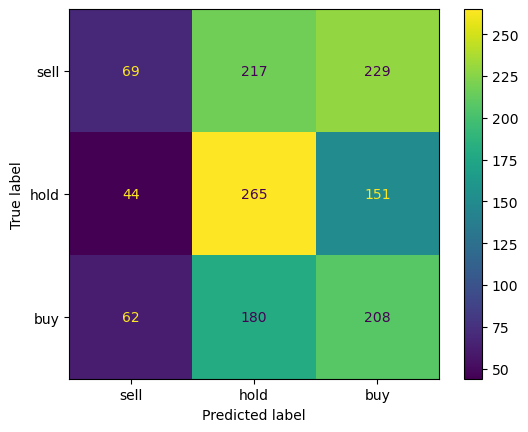

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc * 100, 2)}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [44]:
X_test.shape

(1425, 20)

In [45]:
test_df.shape

(1490, 80)

In [46]:
## predict on indiv stocks
final = []

for stock_name in test_df.stock_name.unique()[:-1]:
    stock_df = test_df[test_df['stock_name'] == stock_name]
    stock_X_test = stock_df[features].to_numpy()
    # if use selectKbest
    stock_X_test = scaler.transform(stock_X_test)
    stock_X_test = selector.transform(stock_X_test)
    # if use PCA
    # stock_X_test = pca.transform(stock_X_test)
    stock_y_test = stock_df[target].to_numpy()
    
    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    y = []
    
    for i, v in enumerate(stock_y_test):
        if stock_y_test[i] == 1 or stock_preds[i] == 1:
            continue
        if stock_y_test[i] == stock_preds[i]:
            y.append(1)
        else:
            y.append(0)
    
    num_correct = sum([1 for x in y if x == 1])
    num_wrong = sum([1 for x in y if x == 0])
    
    relevant_acc = num_wrong / (num_correct + num_wrong)
    final.append((relevant_acc, stock_name))
    
    print(f"{stock_name}: {round(acc*100,2)} | {relevant_acc}")

final.sort()
final
# choose top 10 from here

WDAY: 37.58 | 0.5319148936170213
SNPS: 38.93 | 0.5230769230769231
MDB: 27.52 | 0.640625
DDOG: 41.61 | 0.47058823529411764
BKNG: 33.56 | 0.5614035087719298
PDD: 40.94 | 0.4772727272727273
MELI: 40.94 | 0.4142857142857143
NVDA: 40.27 | 0.4805194805194805
MU: 35.57 | 0.559322033898305


[(0.4142857142857143, 'MELI'),
 (0.47058823529411764, 'DDOG'),
 (0.4772727272727273, 'PDD'),
 (0.4805194805194805, 'NVDA'),
 (0.5230769230769231, 'SNPS'),
 (0.5319148936170213, 'WDAY'),
 (0.559322033898305, 'MU'),
 (0.5614035087719298, 'BKNG'),
 (0.640625, 'MDB')]

In [47]:
y

[0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0]

In [48]:
import pandas as pd
from datetime import datetime

model = best_model

# Convert the datetime column to datetime objects
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Define the date threshold (July 1, 2024)
date_threshold = datetime.strptime('2024-07-01 00:00:00-00:00', '%Y-%m-%d %H:%M:%S%z')

# Filter the DataFrame for dates after July 1, 2024
test_df = df[df['Datetime'] > date_threshold]

stock_list =[
    "DDOG",
    "SNPS",
    "BKNG",
    "SMCI",
    "MDB",
    "NVDA",
    "MELI",
    "WDAY",
    "MU",
    "PDD",
]

test_df = test_df[test_df.stock_name.isin(stock_list)]

def model_to_portfolio(test_df, features, target, model):
    
    res = pd.DataFrame()
    for ticker in test_df.stock_name.unique():
        stock_df = test_df[test_df['stock_name']==ticker]
        stock_X_test = stock_df[features].to_numpy()
        # stock_X_test = pca.transform(stock_X_test)
        stock_X_test = scaler.transform(stock_X_test)
        stock_X_test = selector.transform(stock_X_test)
        stock_X_test = torch.tensor(stock_X_test, dtype=torch.float32)
        stock_preds = model.predict(stock_X_test)

        res[ticker] = pd.Series(stock_preds)
        # print(len(stock_X_test))
        
    res = res.replace({0:-1, 1:0, 2:1})
    res['Date'] = test_df.Datetime.unique()
    res = res.set_index('Date')
    res = res.astype('int16')
    res['total'] = res.apply(lambda x: np.sum(np.abs(x)), axis=1)
    res = res.div(res['total'], axis=0)
    res.drop(columns=['total'], inplace=True)

    return res


res = model_to_portfolio(test_df, features, target, model)
res

ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True, at position 73

In [29]:
res.to_csv('fcn-best-bryan.csv')

In [30]:
a = res.dropna()
a.to_csv('fcn-best-bryan.csv')

array([[ 0.07687478,  0.3774165 , -0.35778399, ..., -0.28120253,
        -0.27422283, -1.40541288],
       [-1.87442953, -1.28281641, -1.7818723 , ..., -1.14307627,
        -1.09325779, -1.40541288],
       [ 0.31963215,  0.39305644, -0.20660434, ...,  0.71380182,
         0.6766329 , -1.40541288],
       ...,
       [-0.57234449,  0.24525934, -0.97528759, ..., -0.44724429,
        -0.49489483, -0.92895359],
       [-0.68732595, -0.61358875, -0.64936092, ..., -0.13041016,
        -0.04688867, -0.92895359],
       [-0.25850585, -0.23718345, -0.29947249, ...,  0.12254665,
         0.14405015, -0.92895359]])

In [52]:
# Get columns to keep and create new dataframe with those only
cols_idxs = selector.get_support(indices=True)
features_df_new = features_df.iloc[:,cols_idxs]
features_df_new

NameError: name 'features_df' is not defined